## 데이터를 받은 후 전처리 과정 실습
### 결측치를 분석 가능한 값으로 바꾼다

In [1]:
import pandas as pd

# 1. 지저분한 원본 데이터(raw) 생성
raw = [
    {"date": "2026-01-01", "menu": "Americano", "price": "4500원", "qty": "2", "paid": "TRUE"},
    {"date": "2026/01/01", "menu": "Latte",     "price": "5,000",  "qty": 1,   "paid": "True"},
    {"date": "2026-01-02", "menu": "Latte",     "price": None,     "qty": 2,   "paid": "FALSE"},
    {"date": "2026-01-03", "menu": "Mocha",     "price": "5500",   "qty": None,"paid": True},
    {"date": "2026-01-03", "menu": "Americano", "price": "4500",   "qty": 1,   "paid": "TRUE"},
    {"date": "2026-01-04", "menu": "Latte",     "price": "5000원", "qty": "3", "paid": "TRUE"},
    {"date": "2026-01-05", "menu": "Tea",       "price": "4000",   "qty": "1", "paid": "TRUE"},
]

# 2. DataFrame으로 변환
df = pd.DataFrame(raw)

# 3. 데이터 눈으로 확인하기
df

,date,menu,price,qty,paid
0,2026-01-01,Americano,4500원,2,TRUE
1,2026/01/01,Latte,"5,000",1,True
2,2026-01-02,Latte,None,2,FALSE
3,2026-01-03,Mocha,5500,None,True
4,2026-01-03,Americano,4500,1,TRUE
5,2026-01-04,Latte,5000원,3,TRUE
6,2026-01-05,Tea,4000,1,TRUE


In [2]:
# 컬럼별 데이터 타입 확인
df.dtypes

date     object
menu     object
price    object
qty      object
paid     object
dtype: object

In [3]:
df.isna().sum()

date     0
menu     0
price    1
qty      1
paid     0
dtype: int64

1. [Price 처리]
   - 'Price' 컬럼에서 "원"을 지운다.
   - ","(쉼표)를 지운다.
   - 숫자로 강제 변환한다. (실패하면 NaN으로)

2. [Qty 처리]
   - 'Qty' 컬럼을 숫자로 강제 변환한다. (실패하면 NaN으로)

3. [Date 처리]
   - 'Date' 컬럼을 날짜 형식으로 강제 변환한다. (형식이 달라도 알아서 해석, 실패하면 NaT)

4. [Paid 처리]
   - "TRUE", "True" 등 대소문자가 섞여있으므로 모두 대문자로 통일한다.
   - "TRUE"는 True로, "FALSE"는 False로 매핑(지도 그리기)한다.

In [4]:
#df["date"] = pd.to_datetime(df["date"], errors="coerce")
df["date"] = pd.to_datetime(df["date"], errors="coerce", format="mixed")
df["date"]

0   2026-01-01
1   2026-01-01
2   2026-01-02
3   2026-01-03
4   2026-01-03
5   2026-01-04
6   2026-01-05
Name: date, dtype: datetime64[ns]

In [5]:
df["price"] = (
    df["price"]
    .astype("string")
    .str.replace("원", "", regex=False)
    .str.replace(",", "", regex=False)
)

df["price"] = pd.to_numeric(df["price"], errors="coerce")
df["price"]

0    4500
1    5000
2    <NA>
3    5500
4    4500
5    5000
6    4000
Name: price, dtype: Int64

In [6]:
df["qty"] = pd.to_numeric(df["qty"], errors="coerce")
df["qty"]


0    2.0
1    1.0
2    2.0
3    NaN
4    1.0
5    3.0
6    1.0
Name: qty, dtype: float64

In [7]:
df["paid"] = df["paid"].astype("string").str.upper()
df["paid"] = df["paid"].map({"TRUE": True, "FALSE": False})
df["paid"]

0     True
1     True
2    False
3     True
4     True
5     True
6     True
Name: paid, dtype: bool

In [8]:
df[["price", "qty"]] = df[["price", "qty"]].fillna(0)
df

,date,menu,price,qty,paid
0,2026-01-01,Americano,4500,2.0,True
1,2026-01-01,Latte,5000,1.0,True
2,2026-01-02,Latte,0,2.0,False
3,2026-01-03,Mocha,5500,0.0,True
4,2026-01-03,Americano,4500,1.0,True
5,2026-01-04,Latte,5000,3.0,True
6,2026-01-05,Tea,4000,1.0,True


모든 결측치 제거 후 확인

In [9]:
df.isna().sum()

date     0
menu     0
price    0
qty      0
paid     0
dtype: int64

In [10]:
df["sales"] = df["price"] * df["qty"]
df

,date,menu,price,qty,paid,sales
0,2026-01-01,Americano,4500,2.0,True,9000.0
1,2026-01-01,Latte,5000,1.0,True,5000.0
2,2026-01-02,Latte,0,2.0,False,0.0
3,2026-01-03,Mocha,5500,0.0,True,0.0
4,2026-01-03,Americano,4500,1.0,True,4500.0
5,2026-01-04,Latte,5000,3.0,True,15000.0
6,2026-01-05,Tea,4000,1.0,True,4000.0


## 시각화 맛보기

<Axes: xlabel='menu'>

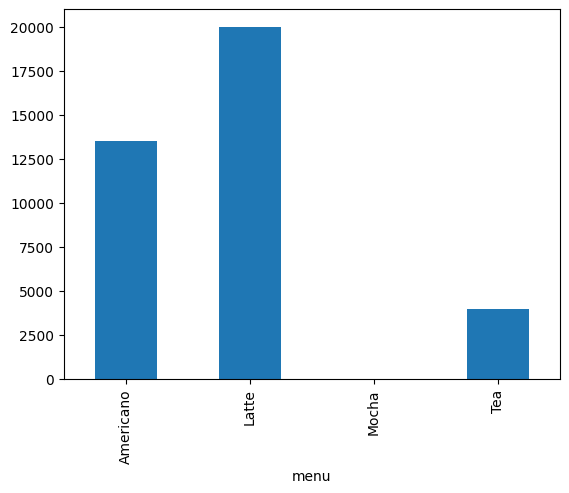

In [11]:
df.groupby("menu")["sales"].sum().plot(kind="bar")

In [12]:
import openpyxl
# 1. CSV로 저장 (가장 기본)
# index=False: 행 번호 저장 안 함
# encoding="utf-8-sig": 엑셀에서 한글 안 깨지게 함
df.to_csv("cafe_sales_clean3.csv", index=False, encoding="utf-8-sig")

# 2. Excel로 저장 (보고용)
# 엑셀 저장을 위해서는 'openpyxl' 라이브러리가 필요합니다. (보통 설치되어 있음)
df.to_excel("cafe_sales_clean3.xlsx", index=False)

# 3. JSON으로 저장 (개발자 전달용)
# force_ascii=False: 한글이 외계어(\uAC00...)로 안 바뀌고 한글 그대로 보이게 함
# indent=2: 줄바꿈과 들여쓰기를 해서 사람이 보기 편하게 함
df.to_json("cafe_sales_clean3.json", orient="records", force_ascii=False, indent=2)

print("저장이 완료되었습니다! 왼쪽의 파일 탐색기 폴더를 확인해보세요.")

저장이 완료되었습니다! 왼쪽의 파일 탐색기 폴더를 확인해보세요.


In [13]:
df_csv = pd.read_csv("cafe_sales_clean3.csv")
df_csv.head()

,date,menu,price,qty,paid,sales
0,2026-01-01,Americano,4500,2.0,True,9000.0
1,2026-01-01,Latte,5000,1.0,True,5000.0
2,2026-01-02,Latte,0,2.0,False,0.0
3,2026-01-03,Mocha,5500,0.0,True,0.0
4,2026-01-03,Americano,4500,1.0,True,4500.0


In [14]:
df_xlsx = pd.read_excel("cafe_sales_clean3.xlsx")
df_xlsx.head()

,date,menu,price,qty,paid,sales
0,2026-01-01,Americano,4500,2,True,9000
1,2026-01-01,Latte,5000,1,True,5000
2,2026-01-02,Latte,0,2,False,0
3,2026-01-03,Mocha,5500,0,True,0
4,2026-01-03,Americano,4500,1,True,4500


In [15]:
df_json = pd.read_json("cafe_sales_clean3.json")
df_json.head()

,date,menu,price,qty,paid,sales
0,2026-01-01,Americano,4500,2,True,9000
1,2026-01-01,Latte,5000,1,True,5000
2,2026-01-02,Latte,0,2,False,0
3,2026-01-03,Mocha,5500,0,True,0
4,2026-01-03,Americano,4500,1,True,4500


In [16]:
df.groupby("menu")["sales"].sum()

menu
Americano    13500.0
Latte        20000.0
Mocha            0.0
Tea           4000.0
Name: sales, dtype: Float64